In [2]:
pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import re
import random

In [21]:
# Loading the excel file
file_path = 'Master_Survey_results copy.xlsx'  
sheet_name = 'Cleaned' 
feedback_column_1 = 'Feedback on Charging' 
feedback_column_2 = 'Additional feedback' 

df = pd.read_excel(file_path, sheet_name=sheet_name)

# Dropping rows where both feedback columns are null
df = df.dropna(subset=[feedback_column_1, feedback_column_2], how='all')

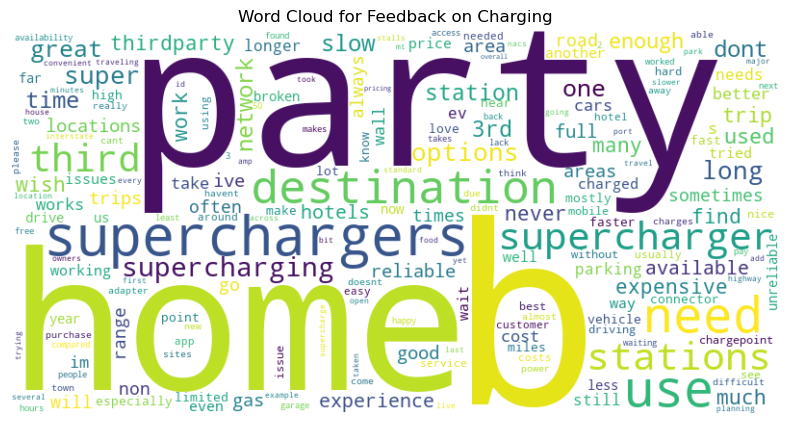

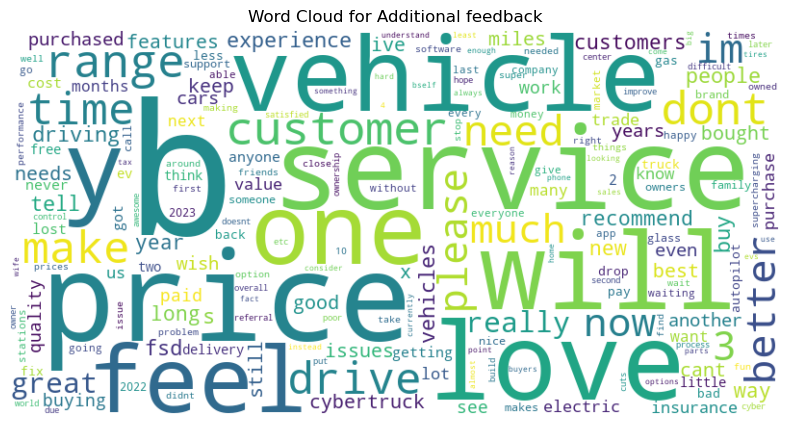

In [29]:
def generate_wordcloud(column_name):
    # Concatenating all non-null feedback from the specified column into a single text
    feedback_text = " ".join(feedback for feedback in df[column_name].dropna().astype(str))

    # Cleaning text: remove punctuation and convert to lowercase
    cleaned_text = re.sub(r'[^\w\s]', '', feedback_text.lower())

    # Defining stopwords
    stopwords = set(STOPWORDS)
    stopwords.update(["charging", "charger", "chargers", "charge", "car", "model"])

    # Removing stopwords from the text
    filtered_words = [word for word in cleaned_text.split() if word not in stopwords]

    # Counting word frequencies
    word_counts = Counter(filtered_words)

    # Generating the word cloud based on word frequencies
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          max_words=200, collocations=False).generate_from_frequencies(word_counts)

    # Displaying the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {column_name}')
    plt.show()

# Generating word clouds for both columns
generate_wordcloud(feedback_column_1)
generate_wordcloud(feedback_column_2)